In [73]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('car data.csv')

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df.shape

(301, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
df.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [11]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [13]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [14]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [15]:
df.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [20]:
# encoding the categorical data

df.Fuel_Type.replace({'Petrol':0, 'Diesel':1,'CNG':2},inplace=True)


In [19]:
df.Seller_Type.replace({'Dealer':0,'Individual':1},inplace=True)

In [23]:
df.Transmission.replace({'Manual':0,'Automatic':1},inplace=True)

In [27]:
df.drop(columns='Car_Name',inplace=True,axis=1)

In [31]:
x=df.drop(columns='Selling_Price',axis=1)
y=df.Selling_Price

In [60]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

### Linear Regression

In [38]:
l=LinearRegression()

In [39]:
l.fit(x_train,y_train)

LinearRegression()

In [42]:
x_train_pred=l.predict(x_train)
x_train_pred

array([ 3.73088505e+00,  5.60702081e+00,  7.79779356e+00, -1.88374756e+00,
        6.71614572e+00,  8.14343296e+00,  5.84067525e+00,  6.17919527e+00,
        6.15863751e+00,  1.59459051e+01,  2.15385926e+00,  1.11618544e+00,
       -4.05463414e-01,  6.69051516e+00,  6.81961414e+00,  1.02957394e+00,
        6.74306974e+00,  1.43864300e+01,  3.00001893e+00,  7.95149024e+00,
       -8.38569413e-01,  9.02067892e+00,  1.21210550e+00,  2.20040027e+00,
       -8.23744275e-01,  7.52651502e-01,  1.00142469e+01, -4.08950275e-01,
       -2.40418357e+00,  9.99845989e+00,  6.81867179e+00,  1.09249928e+00,
        4.36158792e+00,  9.20660480e-02,  3.48993776e+00,  2.78147834e+00,
        1.50401026e+00,  4.65736158e-01,  1.68679810e+00,  1.18722506e+00,
        4.32936153e+00,  6.09932798e+00,  9.51639926e-01,  7.52875828e-01,
        6.05967594e+00,  3.49453005e+00,  2.40969246e+00,  7.52230513e+00,
        4.63113915e+00,  4.44239322e+00,  4.22460259e+00,  2.71077171e+00,
        4.46881874e+00,  

In [43]:
train_score=r2_score(x_train_pred,y_train)
train_score

0.8635655509198954

In [45]:
x_test_pred=l.predict(x_test)

In [46]:
test_score=r2_score(x_test_pred,y_test)
test_score

0.8062199941176169

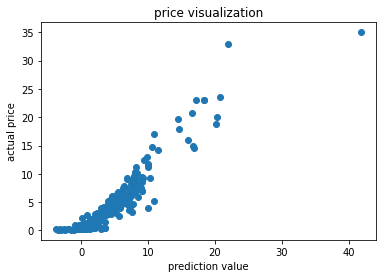

In [51]:
plt.scatter(x_train_pred,y_train)
plt.xlabel('prediction value')
plt.ylabel('actual price')
plt.title('price visualization')
plt.show()

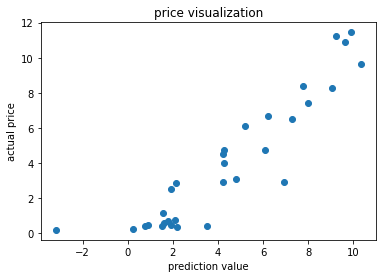

In [52]:
plt.scatter(x_test_pred,y_test)
plt.xlabel('prediction value')
plt.ylabel('actual price')
plt.title('price visualization')
plt.show()

In [53]:
lasso=Lasso()

In [54]:
lasso.fit(x_train,y_train)

Lasso()

In [55]:
x_train_pred=lasso.predict(x_train)

In [56]:
train_score=r2_score(x_train_pred,y_train)
train_score

0.798459024070425

In [57]:
x_test_pred=lasso.predict(x_test)

In [59]:
test_score=r2_score(x_test_pred,y_test)
test_score

0.8062199941176169

## Lasso regression is better than linear regression as we saw in the values.

In [78]:
a=(2014,5.59,27000,0,0,0,0)
a1=np.asarray(a).reshape(1,-1)

In [79]:
x=l.predict(a1)
x[0]

3.8390135356471546

In [80]:
b=(2016,5.90,5464,0,0,0,0)
b1=np.asarray(b).reshape(1,-1)

In [81]:
y=lasso.predict(b1)
y[0]

4.815258887875871